# Simple 3D obeject detection with MediaPipe Objectron

The current project demonstrates how to use MediaPipe Objectron to detect 3D object and draw the 3D shape of the object.
MediaPipe objectron is limited to a few object for instance: shoe, cup and chair.

In [ ]:
## Install mediapipe
!pip install mediapipe --user

## Import modules

In [1]:
import cv2
import numpy as np
import time
from PIL import Image
from IPython.display import display

import mediapipe as mp
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

## Load and display a sample static image for 3D object detection

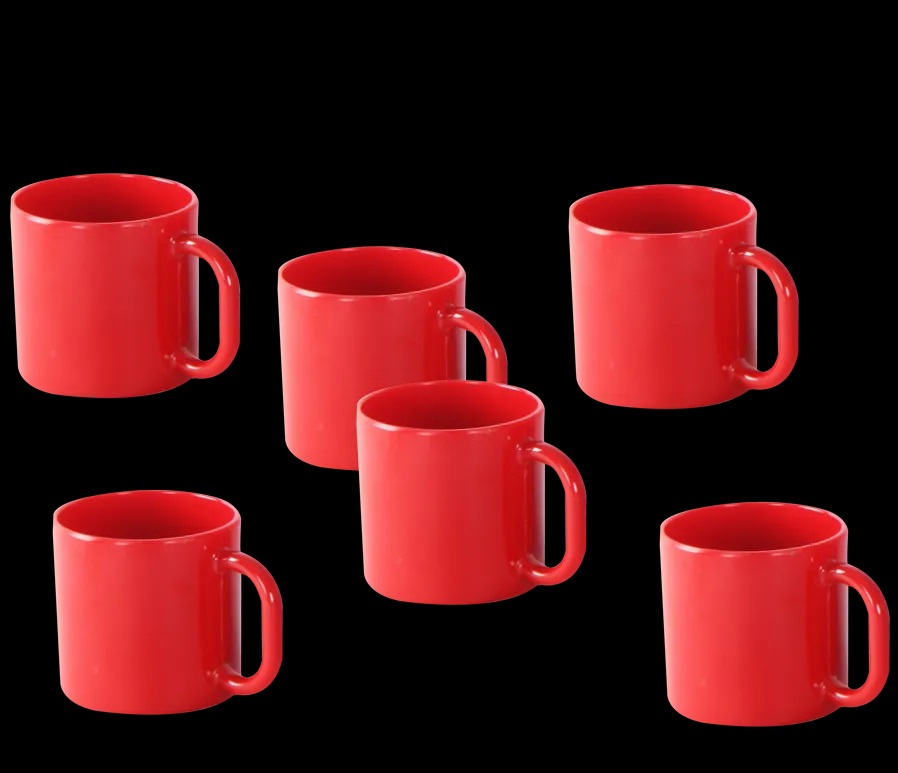

In [3]:
# Open image
img = cv2.imread("Cup2.JPG")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow("frame",cv2.resize(img_rgb, (600,400)))
display(Image.fromarray(img_rgb))

## Running 3D object detection on static image

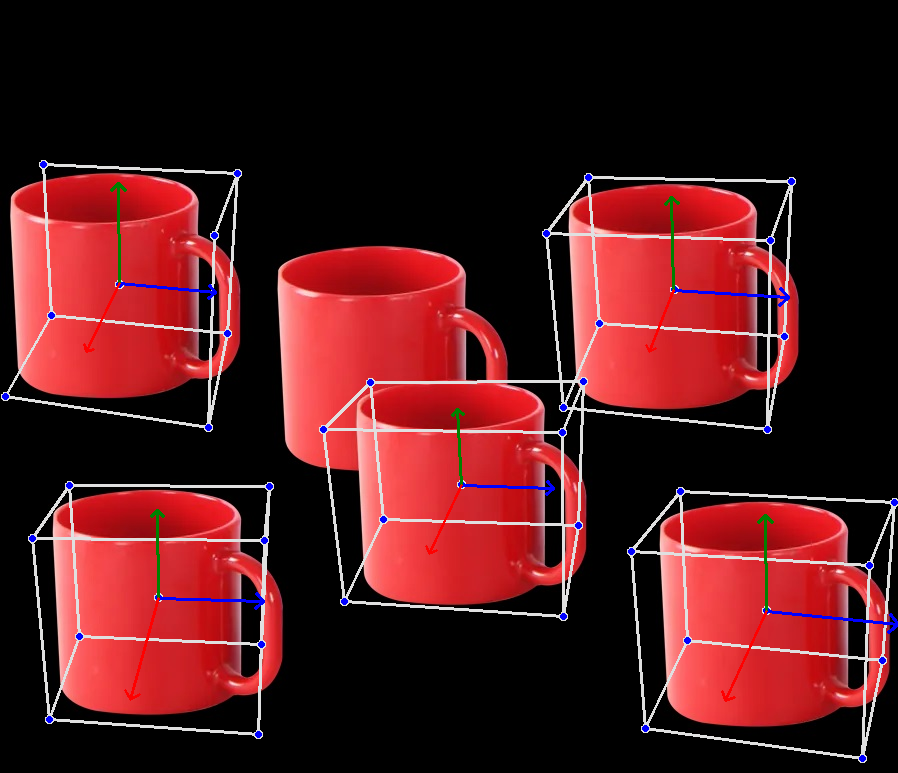

In [3]:
with mp_objectron.Objectron(
    static_image_mode=True,
    max_num_objects=15,
    min_detection_confidence=0.5,
    model_name='Cup') as objectron:
    # Run inference on shoe images.
    #for name, image in shoe_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(img_rgb)

        # Draw box landmarks.
    if not results.detected_objects:
        print(f'No box landmarks detected on {name}')
        #continue

    #print(f'Box landmarks of {name}:')
    annotated_image = img_rgb.copy()
    for detected_object in results.detected_objects:
        mp_drawing.draw_landmarks(annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
        mp_drawing.draw_axis(annotated_image, detected_object.rotation, detected_object.translation)
        #cv2.imshow(annotated_image)
    display(Image.fromarray(annotated_image))

## Run 3D object detection on a video

In [6]:
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture("vecteezy_two-white-coffee-cups-are-placed-over-a-wooden-fence-with-a-beautiful-view-of-the-sea-close-up_1622990.mp4")

with mp_objectron.Objectron(static_image_mode=False,
                            max_num_objects=2,
                            min_detection_confidence=0.5,
                            min_tracking_confidence=0.8,
                            model_name='Cup') as objectron:

   # while cap.isOpened():
    while True:
        success, image = cap.read()
        
        if type(image).__module__ != np.__name__ :
            break
        
        start = time.time()
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = objectron.process(image)

        image.flags.writeable=True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        image2 = image.copy()
        
        if results.detected_objects:
            for detected_object in results.detected_objects:
                mp_drawing.draw_landmarks(image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
                mp_drawing.draw_axis(image, detected_object.rotation, detected_object.translation)

        end = time.time()
        totalTime = end - start

        fps = 1/totalTime

        cv2.putText(image2, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
        cv2.imshow("Objectron", cv2.resize(image, (600,400)))
        cv2.imshow("Objectron2", cv2.resize(image2, (600,400)))

        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()

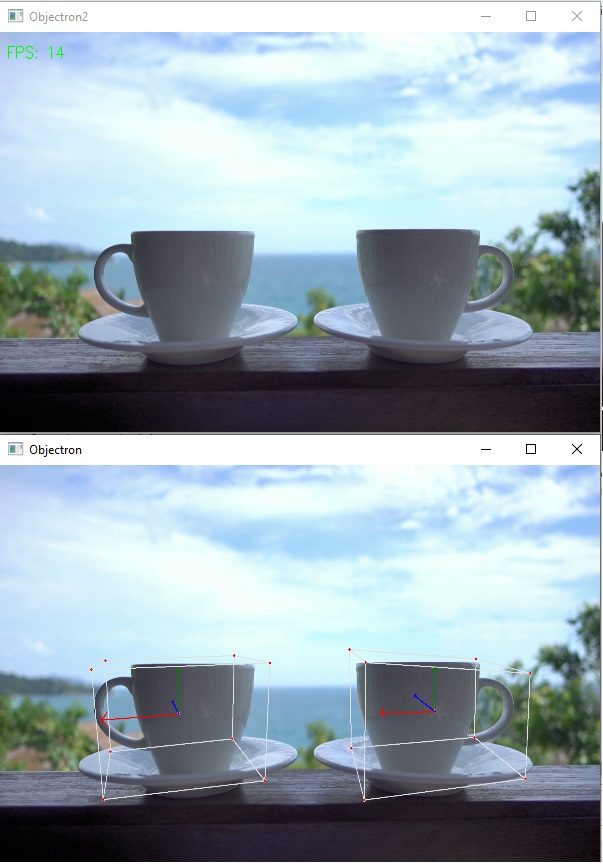

In [7]:
# Open image
img = cv2.imread("Cup_Video1.JPG")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow("frame",cv2.resize(img_rgb, (600,400)))
display(Image.fromarray(img_rgb))

## Remarks

The mdediapipe objectron is currently limited to a few objects: Cup, Chair and Shoe.